In [2]:
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.datasets import cifar10

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

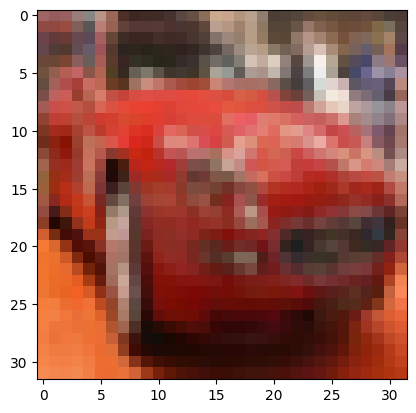

In [6]:
plt.imshow(x_train[5])

## Limpieza

In [7]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [8]:
num_clases = len(np.unique(y_train))
y_train = to_categorical(y_train, num_clases)
y_test = to_categorical(y_test, num_clases)

In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [10]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

print('x_train shape;', x_train.shape)

print('train;', x_train.shape[0])
print('val;', x_valid.shape[0])
print('test;', x_test.shape[0])

x_train shape; (45000, 32, 32, 3)
train; 45000
val; 5000
test; 10000


In [11]:
base_filtros = 32
w_regulatizer = 1e-4

In [12]:
x_train.shape[1:]

(32, 32, 3)

In [13]:
model = Sequential()
## conv 1
model.add(Conv2D(base_filtros, (3,3), padding ='same', kernel_regularizer=regularizers.l2(w_regulatizer), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

## conv 2
model.add(Conv2D(base_filtros, (3,3), padding ='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

## conv 3
model.add(Conv2D(2*base_filtros, (3,3), padding ='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## conv 4
model.add(Conv2D(2*base_filtros, (3,3), padding ='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

## conv 5
model.add(Conv2D(4*base_filtros, (3,3), padding ='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))

## conv 6
model.add(Conv2D(4*base_filtros, (3,3), padding ='same', kernel_regularizer=regularizers.l2(w_regulatizer)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - flatten
model.add(Flatten())
model.add(Dense(num_clases, activation='softmax'))

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        20,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,498 (1.17 MB)

 Trainable params: 307,498 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',
             metrics=['accuracy'])

In [15]:
hist = model.fit(x_train, y_train, batch_size=32,epochs=100,
                validation_data=(x_valid, y_valid),
                verbose=2, shuffle=True)

Epoch 1/100


I0000 00:00:1729805062.976619      99 service.cc:145] XLA service 0x789ba0003650 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1729805062.976662      99 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1729805062.976666      99 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1729805071.383953      99 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1407/1407 - 23s - 17ms/step - accuracy: 0.3901 - loss: 1.7063 - val_accuracy: 0.5452 - val_loss: 1.3111
Epoch 2/100
1407/1407 - 5s - 4ms/step - accuracy: 0.5702 - loss: 1.2591 - val_accuracy: 0.6318 - val_loss: 1.1100
Epoch 3/100
1407/1407 - 5s - 4ms/step - accuracy: 0.6356 - loss: 1.0941 - val_accuracy: 0.6282 - val_loss: 1.1178
Epoch 4/100
1407/1407 - 5s - 4ms/step - accuracy: 0.6768 - loss: 1.0009 - val_accuracy: 0.6718 - val_loss: 1.0425
Epoch 5/100
1407/1407 - 5s - 4ms/step - accuracy: 0.7009 - loss: 0.9415 - val_accuracy: 0.7058 - val_loss: 0.9261
Epoch 6/100
1407/1407 - 5s - 4ms/step - accuracy: 0.7172 - loss: 0.9089 - val_accuracy: 0.6914 - val_loss: 1.0251
Epoch 7/100
1407/1407 - 5s - 4ms/step - accuracy: 0.7273 - loss: 0.8863 - val_accuracy: 0.7570 - val_loss: 0.8088
Epoch 8/100
1407/1407 - 5s - 4ms/step - accuracy: 0.7359 - loss: 0.8626 - val_accuracy: 0.7572 - val_loss: 0.7985
Epoch 9/100
1407/1407 - 5s - 4ms/step - accuracy: 0.7413 - loss: 0.8529 - val_accuracy: 0.7670 - v

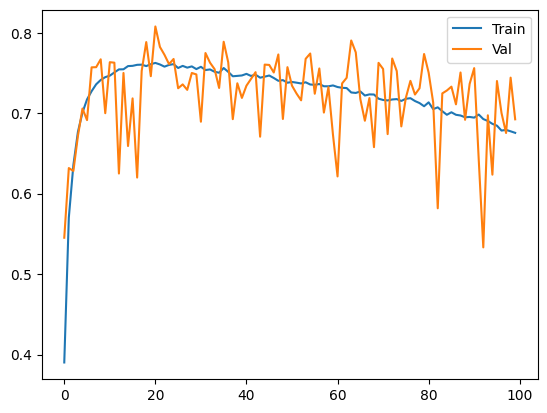

In [16]:
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Val')
plt.legend()
plt.show()

In [17]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6883 - loss: 1.1027


[1.113625407218933, 0.6850000023841858]